In [ ]:
#Sheyenne Harris
#Machine Learning Project

In [1]:
import pandas as pd
import csv
!pip install imageio
import imageio
from imageio import imread, imsave

In [2]:
#Data cleaning
data = pd.read_csv("exams.csv").dropna()
data['lunch']=data['lunch'].replace(to_replace="free/reduced", value="reduced")
print(data)

     gender race/ethnicity parental level of education     lunch  \
0      male        group A                 high school  standard   
1    female        group D            some high school   reduced   
2      male        group E                some college   reduced   
3      male        group B                 high school  standard   
4      male        group E          associate's degree  standard   
..      ...            ...                         ...       ...   
995    male        group C                 high school  standard   
996    male        group D          associate's degree   reduced   
997  female        group C            some high school   reduced   
998  female        group C                some college  standard   
999    male        group A                some college  standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67             63  
1                      none          40

In [5]:
#Is the data robust?
print(len(data.columns)) #amount of rows
print(data.head(0)) #column names
print(data.index) #count of data index

8
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)


In [18]:
#Data statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB
None
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64


<AxesSubplot:>

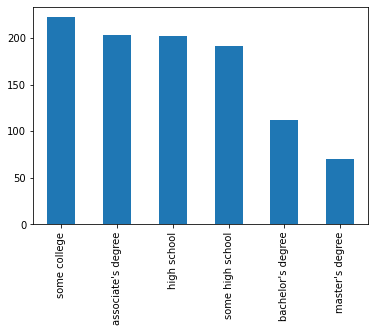

In [35]:
print(data['parental level of education'].value_counts()) #most parents have some college
parent_edu = data['parental level of education'].value_counts()
parent_edu.plot.bar()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64


<AxesSubplot:>

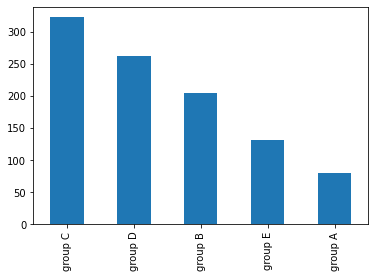

In [36]:
print(data['race/ethnicity'].value_counts())
race = data['race/ethnicity'].value_counts()
race.plot.bar()

In [13]:
print(data.groupby("parental level of education")["math score"].mean())
print(data.groupby("parental level of education")["reading score"].mean())
print(data.groupby("parental level of education")["writing score"].mean())

#math = data.groupby("parental level of education")["math score"].mean()
#reading = data.groupby("parental level of education")["reading score"].mean()
#writing = data.groupby("parental level of education")["writing score"].mean()


parental level of education
associate's degree    69.536946
bachelor's degree     71.491071
high school           65.207921
master's degree       71.585714
some college          65.297297
some high school      60.701571
Name: math score, dtype: float64
parental level of education
associate's degree    70.985222
bachelor's degree     74.008929
high school           67.400990
master's degree       75.428571
some college          68.045045
some high school      64.408377
Name: reading score, dtype: float64
parental level of education
associate's degree    70.113300
bachelor's degree     74.410714
high school           64.846535
master's degree       75.885714
some college          66.734234
some high school      62.539267
Name: writing score, dtype: float64


In [30]:
print(data.groupby("parental level of education")["lunch"].value_counts())
#Most students are on standard lunch

parental level of education  lunch   
associate's degree           standard    132
                             reduced      71
bachelor's degree            standard     80
                             reduced      32
high school                  standard    136
                             reduced      66
master's degree              standard     46
                             reduced      24
some college                 standard    134
                             reduced      88
some high school             standard    124
                             reduced      67
Name: lunch, dtype: int64


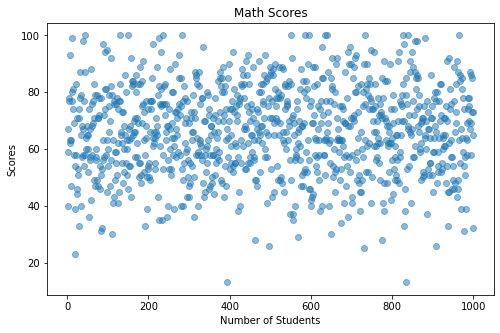

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
x = range(1,1001)
y = data['math score']
plt.scatter(x, y, marker = 'o', alpha=0.5)
plt.title("Math Scores") #title
plt.xlabel("Student ID") #x label
plt.ylabel("Scores") #y label
plt.show()

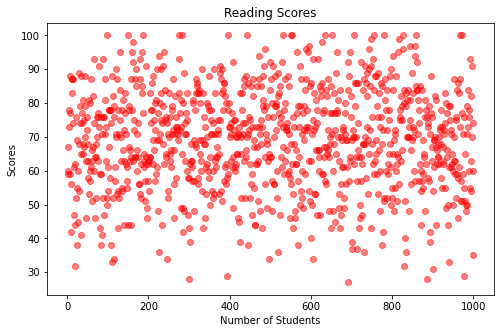

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
x = range(1,1001)
y = data['reading score']
plt.scatter(x, y, color = 'r', marker = 'o', alpha=0.5)
plt.title("Reading Scores") #title
plt.xlabel("Student ID") #x label
plt.ylabel("Scores") #y label
plt.show()

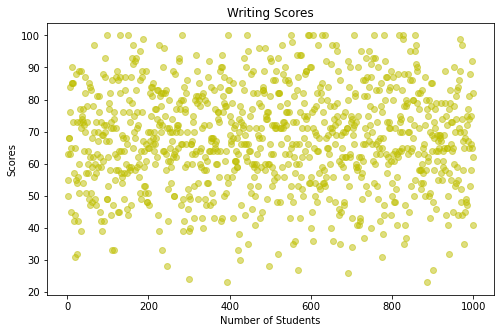

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
x = range(1,1001)
y = data['writing score']
plt.scatter(x, y, color = 'y', marker = 'o', alpha=0.5)
plt.title("Writing Scores") #title
plt.xlabel("Student ID") #x label
plt.ylabel("Scores") #y label
plt.show()

<AxesSubplot:ylabel='Frequency'>

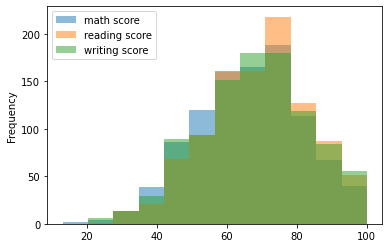

In [73]:
data.plot.hist(bins=12, alpha=0.5)

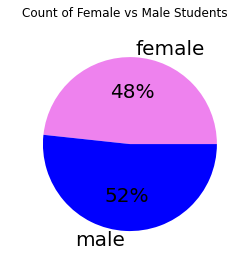

male      517
female    483
Name: gender, dtype: int64


In [101]:
data.groupby('gender').size().plot(kind='pie', ylabel = ' ', title = 'Count of Female vs Male Students', autopct='%1.0f%%', textprops={'fontsize': 20}, colors=['violet', 'blue'], subplots = True)
plt.show()
print(data['gender'].value_counts())

In [89]:
print(data.groupby("test preparation course")["math score"].mean())
print(data.groupby("test preparation course")["reading score"].mean())
print(data.groupby("test preparation course")["writing score"].mean())
#Shows students that completed test prep averaged higher scores than those that didnt

test preparation course
completed    69.686567
none         64.738346
Name: math score, dtype: float64
test preparation course
completed    74.089552
none         66.439098
Name: reading score, dtype: float64
test preparation course
completed    74.671642
none         64.245113
Name: writing score, dtype: float64


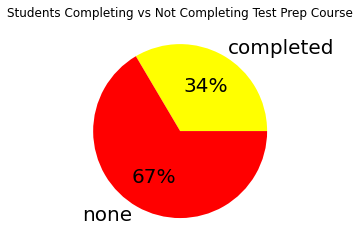

none         665
completed    335
Name: test preparation course, dtype: int64


In [102]:
data.groupby('test preparation course').size().plot(kind='pie', ylabel = ' ', title = 'Students Completing vs Not Completing Test Prep Course', autopct='%1.0f%%', textprops={'fontsize': 20}, colors=['yellow', 'red'])
plt.show()
print(data['test preparation course'].value_counts())
